#1.4.12 Template Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('20201105.png',0)
img2 = img.copy()
template = cv2.imread('2022.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

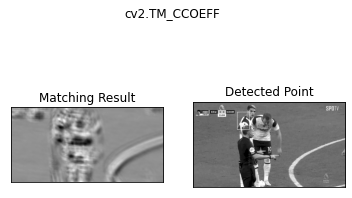

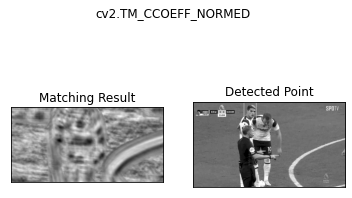

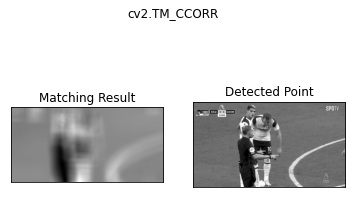

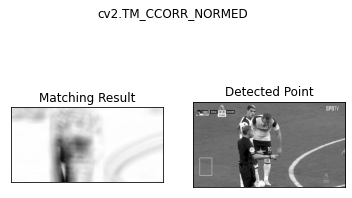

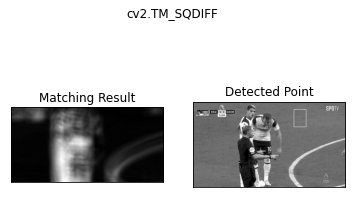

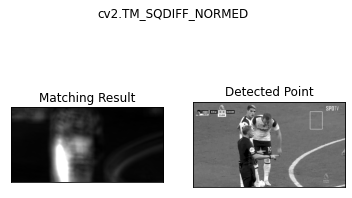

In [3]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
# Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# Template Matching with Multiple Objects

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img_rgb = cv2.imread('20201105.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('2022.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [6]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('res.png',img_rgb)

True

In [7]:
loc

(array([], dtype=int64), array([], dtype=int64))

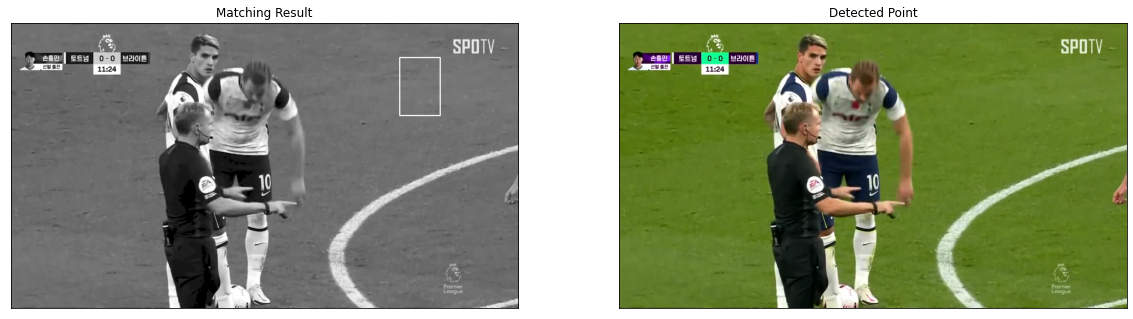

In [8]:
plt.figure(figsize=(20,10))
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(img_rgb)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
img_rgb = cv2.imread('man2.png')
img = img_rgb.copy()
img_gray= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('man1.png')
template= cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
method = eval('cv2.TM_CCOEFF_NORMED')
# Apply template Matching
res = cv2.matchTemplate(img_gray,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_rgb,top_left, bottom_right, (0,0,255), 4)
cv2.imwrite('res.png',img_rgb)

True

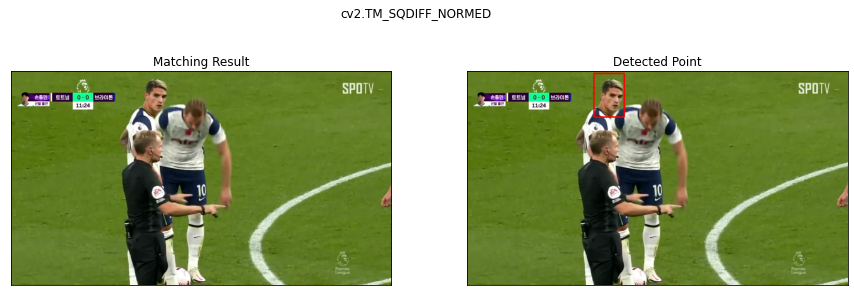

In [12]:
plt.figure(figsize=(15,5))
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(img)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
img_rgb= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(img_rgb)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)
plt.show()

NameError: name 'img_back' is not defined

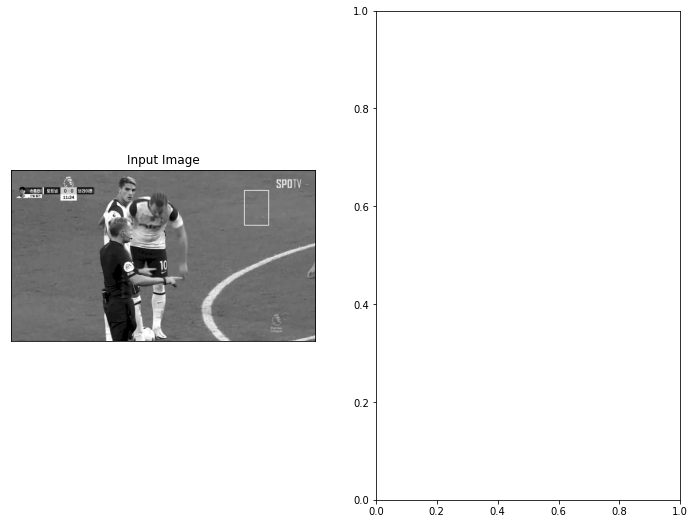

In [24]:
plt.figure(figsize=(12,9))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_rgb)
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()